# Prod_FinalData2

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [24]:
df_data2 = pd.read_csv('Prod_FinalData2.csv')
df_data2.head()

,Unnamed: 0,RECORDID,DOCUMENTID,LOCALEID,INDEXMASTERIDENTIFIERS,NAME,Duplicate,PK,Tags
0,0,0000033f70114e2090be7df776af9b3c,SLN293489,zh_CN,?12?PowerEdge?PowerVault Delta????(PSU)????,PowerEdge,1,0000033f70114e2090be7df776af9b3c SLN293489,"PowerEdge, Remove Disclaimer - Copy Writer Rev..."
1,1,0000033f70114e2090be7df776af9b3c,SLN293489,zh_CN,?12?PowerEdge?PowerVault Delta????(PSU)????,Remove Disclaimer - Copy Writer Review,1,0000033f70114e2090be7df776af9b3c SLN293489,"PowerEdge, Remove Disclaimer - Copy Writer Rev..."
2,2,0000033f70114e2090be7df776af9b3c,SLN293489,zh_CN,?12?PowerEdge?PowerVault Delta????(PSU)????,PowerVault,0,0000033f70114e2090be7df776af9b3c SLN293489,"PowerEdge, Remove Disclaimer - Copy Writer Rev..."
3,3,000056498f4f418c8b7b78da4b56c728,SLN288401,es_ES,Latitude 6430u guía de eliminación de desmonta...,Remove Disclaimer - Copy Writer Review,1,000056498f4f418c8b7b78da4b56c728 SLN288401,"Remove Disclaimer - Copy Writer Review, Tech S..."
4,4,000056498f4f418c8b7b78da4b56c728,SLN288401,es_ES,Latitude 6430u guía de eliminación de desmonta...,Tech Support,1,000056498f4f418c8b7b78da4b56c728 SLN288401,"Remove Disclaimer - Copy Writer Review, Tech S..."


# See Language distribution first

In [104]:
language = df_data2.groupby(['PK'])[['LOCALEID']].max()
language.reset_index()

,PK,LOCALEID
0,0000033f70114e2090be7df776af9b3c SLN293489,zh_CN
1,000056498f4f418c8b7b78da4b56c728 SLN288401,es_ES
2,00007b2b104f49c0a3590119ab8213d6 SLN295763,tr_TR
3,00022a3e8a714e1ead50204a6956b39d SLN128938,zh_CN
4,0005400986fa46eb85b944f1e96bb181 SLN291193,zh_CN
...,...,...
116305,fffe0e48ff234b008596af7b4d074ad2 SLN291276,ko_KR
116306,fffe867bff1d411c89cdd622c09ee3cd SLN288782,it_IT
116307,ffff65f3652647f29c65803cfe942560 SLN309451,nl_NL
116308,ffff805e6b664456b5cedf97f124f4ce QNA44077,tr_TR


In [105]:
print('Total number of articles: ',len(language))
print('Total Anumber of rows in the dataset: ', len(df_data2))

Total number of articles:  116310
Total Anumber of rows in the dataset:  695451


In [106]:
language

,LOCALEID
PK,
0000033f70114e2090be7df776af9b3c SLN293489,zh_CN
000056498f4f418c8b7b78da4b56c728 SLN288401,es_ES
00007b2b104f49c0a3590119ab8213d6 SLN295763,tr_TR
00022a3e8a714e1ead50204a6956b39d SLN128938,zh_CN
0005400986fa46eb85b944f1e96bb181 SLN291193,zh_CN
...,...
fffe0e48ff234b008596af7b4d074ad2 SLN291276,ko_KR
fffe867bff1d411c89cdd622c09ee3cd SLN288782,it_IT
ffff65f3652647f29c65803cfe942560 SLN309451,nl_NL


In [108]:
language_2 = language['LOCALEID'].value_counts()

In [111]:
language_2 = pd.DataFrame(language_2)

In [112]:
language_2['% of Total Articles'] = round(100 * language_2['LOCALEID']/sum(language_2['LOCALEID']),2)
language_2[:10]

,LOCALEID,% of Total Articles
en_US,18302,15.74
ja_JP,9191,7.90
zh_CN,7299,6.28
pt_PT,6889,5.92
fr_FR,6837,5.88
es_ES,6826,5.87
de_DE,6772,5.82
ko_KR,6312,5.43
pl_PL,5893,5.07
it_IT,5807,4.99


Text(0.5, 1.0, 'Language Distribution')

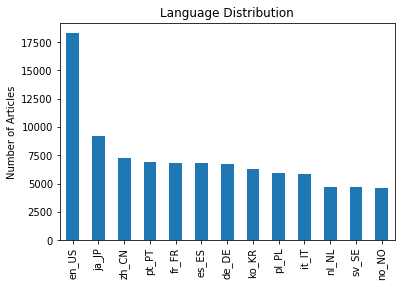

In [113]:
language['LOCALEID'].value_counts()[:13].plot(kind='bar')
plt.ylabel('Number of Articles')
plt.title('Language Distribution')

In [114]:
mask = language['LOCALEID'] == 'en_US'
len(language[mask])

18302

### Tag

In [115]:
df_en_US = df_data2[df_data2['LOCALEID']=='en_US']

In [116]:
df_hold = df_en_US.copy(deep=True)
df_hold['Tags_list'] = ''


for i in range(len(df_hold)):
    df_hold['Tags_list'].iloc[i] = df_hold['Tags'].iloc[i].split(',')



In [117]:
df_hold

,Unnamed: 0,RECORDID,DOCUMENTID,LOCALEID,INDEXMASTERIDENTIFIERS,NAME,Duplicate,PK,Tags,Tags_list
86,86,000bcbfa5bb14cf08802224cb98079f7,SLN124546,en_US,How to Access the Alienware Support Area - KB ...,Alienware,0,000bcbfa5bb14cf08802224cb98079f7 SLN124546,Alienware,[Alienware]
89,89,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Dell Storage SCv3020,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...","[Dell Storage SCv3020, Dell Storage SC8000, ..."
90,90,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Dell Storage SC8000,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...","[Dell Storage SCv3020, Dell Storage SC8000, ..."
91,91,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Remove Disclaimer - Copy Writer Review,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...","[Dell Storage SCv3020, Dell Storage SC8000, ..."
92,92,000ff6eccd8d4719a64feb010b4645f4,SLN309018,en_US,Storage Center Upgrade Health Checker: Enfor...,Dell Compellent SC4020,1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,"Dell Storage SCv3020, Dell Storage SC8000, Rem...","[Dell Storage SCv3020, Dell Storage SC8000, ..."
...,...,...,...,...,...,...,...,...,...,...
695277,695277,ffece9a06f2c42a0b575296aa467e604,SLN145162,en_US,"Adjust the Screen Resolution, Color Depth, Ref...",Inspiron 3655,1,ffece9a06f2c42a0b575296aa467e604 SLN145162,"Latitude 5590, Vostro 3670, Latitude 5491, Opt...","[Latitude 5590, Vostro 3670, Latitude 5491, ..."
695278,695278,ffece9a06f2c42a0b575296aa467e604,SLN145162,en_US,"Adjust the Screen Resolution, Color Depth, Ref...",Remove Disclaimer - Copy Writer Review,1,ffece9a06f2c42a0b575296aa467e604 SLN145162,"Latitude 5590, Vostro 3670, Latitude 5491, Opt...","[Latitude 5590, Vostro 3670, Latitude 5491, ..."
695279,695279,ffece9a06f2c42a0b575296aa467e604,SLN145162,en_US,"Adjust the Screen Resolution, Color Depth, Ref...",OptiPlex 7450 All In One,0,ffece9a06f2c42a0b575296aa467e604 SLN145162,"Latitude 5590, Vostro 3670, Latitude 5491, Opt...","[Latitude 5590, Vostro 3670, Latitude 5491, ..."
695280,695280,ffed6779099d4688963a5fb2c6ee6bae,SLN310666,en_US,PowerEdge R920,Remove Disclaimer - Copy Writer Review,1,ffed6779099d4688963a5fb2c6ee6bae SLN310666,"Remove Disclaimer - Copy Writer Review, TechCe...","[Remove Disclaimer - Copy Writer Review, Tech..."


In [42]:
df_en_US_tag = pd.DataFrame(df_en_US['NAME'].value_counts())
df_en_US_tag.rename(columns={'NAME':'Number of Articles'},inplace = True)
df_en_US_tag['% of Articles'] = round(100*df_en_US_tag['Number of Articles']/sum(df_en_US_tag['Number of Articles']),2)
df_en_US_tag[:20]

,Number of Articles,% of Articles
Remove Disclaimer - Copy Writer Review,12490,15.70
Tech Support,3847,4.84
Servers,2519,3.17
TechCenter Migration,2498,3.14
Top Solution,2086,2.62
Not Searchable in FAST,1925,2.42
Bulk Archive,1358,1.71
External Content Archive,1133,1.42
PowerEdge,1078,1.35
IPS / PG,860,1.08


In [45]:
df_en_US_tag

,Number of Articles,% of Articles
Remove Disclaimer - Copy Writer Review,12490,15.70
Tech Support,3847,4.84
Servers,2519,3.17
TechCenter Migration,2498,3.14
Top Solution,2086,2.62
...,...,...
Cisco Catalyst 4948-10GE,1,0.00
Dell SE2717H,1,0.00
Latitude C610,1,0.00
Dell DR6300,1,0.00


In [49]:
#df_en_US_tag.sort_values(by='Number of Articles',ascending=True)
df_en_US_tag[df_en_US_tag['Number of Articles'] == 1]

,Number of Articles,% of Articles
PowerVault 745N,1,0.0
Dell Command | Integration Suite for Microsoft System Center v5.1,1,0.0
XPS M1710,1,0.0
Dell EMC Repository Manager - Current Versions,1,0.0
Dell Open Manage Print Manager Software,1,0.0
...,...,...
Cisco Catalyst 4948-10GE,1,0.0
Dell SE2717H,1,0.0
Latitude C610,1,0.0
Dell DR6300,1,0.0


In [122]:
df_en_US_tag[df_en_US_tag['Number of Articles'] > 9]
df_en_US_tag = df_en_US_tag.reset_index()

In [124]:
df_en_US_new = df_en_US.merge(df_en_US_tag,left_on='NAME',right_on='index')
len(df_en_US_new)

79562

In [127]:
df_en_US_new

,Unnamed: 0,RECORDID,DOCUMENTID,LOCALEID,INDEXMASTERIDENTIFIERS,NAME,Duplicate,PK,Tags,index,Number of Articles,% of Articles
0,86,000bcbfa5bb14cf08802224cb98079f7,SLN124546,en_US,How to Access the Alienware Support Area - KB ...,Alienware,0,000bcbfa5bb14cf08802224cb98079f7 SLN124546,Alienware,Alienware,168,0.21
1,2239,00a9da64f8ee4355bde012f61ac1a028,LNK16320,en_US,Alienware Mobiles: Troubleshooting Your Batter...,Alienware,1,00a9da64f8ee4355bde012f61ac1a028 LNK16320,"Alienware, Bulk Archive, Not Searchable in FAST",Alienware,168,0.21
2,11297,03e6f8ba5e72458ea4b54b045c87b222,SLN151825,en_US,Can I use the AC adapter for my Dell portable ...,Alienware,1,03e6f8ba5e72458ea4b54b045c87b222 SLN151825,"Venue, Latitude Tablets, Mobile Devices, Inspi...",Alienware,168,0.21
3,11467,03f7992854b742bab6705b4bb86a290c,SLN318080,en_US,Alienware Command Center Causing Slow Performa...,Alienware,1,03f7992854b742bab6705b4bb86a290c SLN318080,"IPS / PG, Alienware, PSQN",Alienware,168,0.21
4,11638,04060dd9a5cd412cafe0fd08ea05c12b,SLN114853,en_US,Alienware System Overheats or Shuts Down,Alienware,1,04060dd9a5cd412cafe0fd08ea05c12b SLN114853,"Alienware 15 R2, Alienware M11x R3, Alienware ...",Alienware,168,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...
79557,686238,fca16bbf95f2435982ae18d8d3022524,SLN318494,en_US,Assign and Unassign hot spare in system setup ...,OEMR R940xa,1,fca16bbf95f2435982ae18d8d3022524 SLN318494,"OEMR R440, Remove Disclaimer - Copy Writer Rev...",OEMR R940xa,1,0.00
79558,687124,fceb483105c94484b0557aae814bf51b,SLN319598,en_US,Preventing Burn-in and Image Retention on your...,Alienware 55 OLED Monitor AW5520QF,0,fceb483105c94484b0557aae814bf51b SLN319598,"Remove Disclaimer - Copy Writer Review, Alienw...",Alienware 55 OLED Monitor AW5520QF,1,0.00
79559,687536,fd1824b821944fd39984edf92c61f621,SLN316955,en_US,Dell EMC Enterprise Systems Rack Rails: 1U / 2...,Networking Solution Resources,1,fd1824b821944fd39984edf92c61f621 SLN316955,"Networking Solution Resources, Remove Disclaim...",Networking Solution Resources,1,0.00
79560,688037,fd5361a53c404d17a406573fe2eef73f,SLN302332,en_US,How to update Dell system BIOS in WinPE10x64 e...,Global Services Readiness,1,fd5361a53c404d17a406573fe2eef73f SLN302332,"Client Support (Consumer), R7910 XL, Precision...",Global Services Readiness,1,0.00


In [126]:
len(df_en_US_new[df_en_US_new['Number of Articles']>9])

74074

In [50]:
len(df_en_US_tag)

2987

In [93]:
df_de_DE = df_data2[df_data2['LOCALEID'] == 'de_DE']

In [94]:
 df_de_tag = pd.DataFrame(df_de_DE['NAME'].value_counts())
df_de_tag.rename(columns={'NAME':'Number of Articles'},inplace = True)
df_de_tag['% of Articles'] = round(100*df_de_tag['Number of Articles']/sum(df_de_tag['Number of Articles']),2)
df_de_tag[:20]

,Number of Articles,% of Articles
Remove Disclaimer - Copy Writer Review,4866,12.39
Tech Support,1920,4.89
Top Solution,1708,4.35
IPS / PG,540,1.37
Servers,529,1.35
PowerEdge,402,1.02
Not Searchable in FAST,380,0.97
Engineering,368,0.94
PSQN,364,0.93
Windows 10,349,0.89


In [ ]:

# unique_tags =pd.DataFrame()
# unique_tags['PK'] = ''
# unique_tags['Tags'] = ''
    
# for i in range(len(df_hold['Tags_list'])):
#     for j in range(len(df_hold['Tags_list'].iloc[i])):
#         df_hold['Tags_list'].iloc[i][j] = df_hold['Tags_list'].iloc[i][j].rstrip().lstrip()
#         unique_tags['PK'][i+j] = df_hold['PK'][i+j]
#         unique_tags['Tags'][i+j] = df_hold['Tags_list'][]

# print(len(set(unique_tags)))

In [22]:
# create datafrom only containing english articles
df_en_US = df_hold[df_hold['LOCALEID'] == 'en_US']

NameError: name 'df_hold' is not defined

In [71]:
tag = pd.DataFrame(df_en_US.groupby(['PK'])['NAME'].count())
#print('total tags')
tag = tag.reset_index()
#len(tag) - len(unique(tag))

In [72]:
print('Minimum Tags that articles have :', tag['NAME'].min())
print('Maximum Tags that articles have :', tag['NAME'].max())
print('Mean Tags that articles have :', tag['NAME'].mean())

Minimum Tags that articles have : 1
Maximum Tags that articles have : 282
Mean Tags that articles have : 4.347175172112338


In [73]:
unique_tags = pd.DataFrame(data = unique_tags)

NameError: name 'unique_tags' is not defined

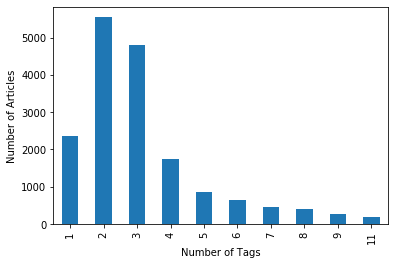

In [85]:
#tag['NAME'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Articles')
tag_top10 = tag['NAME'].value_counts()[:10]
tag_top10.sort_index().plot(kind='bar')
tag_top10 = pd.DataFrame(tag_top10)

In [62]:
ta

,PK,NAME,% of Total English Articles
0,000bcbfa5bb14cf08802224cb98079f7 SLN124546,1,0.001257
1,000ff6eccd8d4719a64feb010b4645f4 SLN309018,10,0.012569
2,00138ca3f6044a0087ec61c1c36ac5b1 HOW13669,3,0.003771
3,0013c39095fc4e99a0dda48d0d90faaf QNA27848,1,0.001257
4,0015c525a778441aa4d958bf29544dce LNK13207,1,0.001257
...,...,...,...
18297,ffeaea848e75476ba2733be2c231560a SLN311348,2,0.002514
18298,ffeb1dac463b485b823d7309970c69c2 QNA44076,4,0.005028
18299,ffec744cd7ac4d15bb03775e9132542a SLN248001,2,0.002514
18300,ffece9a06f2c42a0b575296aa467e604 SLN145162,56,0.070385


In [72]:
Tag_number = pd.DataFrame(tag['NAME'].value_counts())
Tag_number.rename(columns={'NAME':'Number of Articles'},inplace = True)
#Tag_number.rename(index='Number of Tags',inplace = True)
Tag_number['% of Total English Articles'] = round(100*Tag_number['Number of Articles']/sum(Tag_number['Number of Articles']),2)


In [78]:
Tag_number = Tag_number.rename(columns={Tag_number.index.name:'Number of Tags'})
Tag_number[:11]

,Number of Articles,% of Total English Articles
2,5551,30.33
3,4807,26.26
1,2348,12.83
4,1749,9.56
5,859,4.69
6,636,3.48
7,445,2.43
8,400,2.19
9,259,1.42
11,190,1.04


### For German Articles:

In [96]:
df_de_DE = df_data2[df_data2['LOCALEID'] == 'de_DE']
tag_de = pd.DataFrame(df_de_DE.groupby(['PK'])['NAME'].count())
tag_de = tag_de.reset_index()
print('Minimum Tags that articles have :', tag_de['NAME'].min())
print('Maximum Tags that articles have :', tag_de['NAME'].max())
print('Mean Tags that articles have :', tag_de['NAME'].mean())

Minimum Tags that articles have : 1
Maximum Tags that articles have : 353
Mean Tags that articles have : 5.8007974010632015


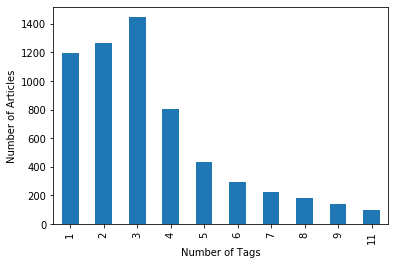

In [99]:
#tag_de['NAME'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Articles')
tag_de_top10 = tag_de['NAME'].value_counts()[:10]
tag_de_top10.sort_index().plot(kind='bar')

In [83]:
Tag_number_de = pd.DataFrame(tag_de['NAME'].value_counts())
Tag_number_de.rename(columns={'NAME':'Number of Articles'},inplace = True)
#Tag_number.rename(index='Number of Tags',inplace = True)
Tag_number_de['% of Total English Articles'] = round(100*Tag_number_de['Number of Articles']/sum(Tag_number_de['Number of Articles']),2)
Tag_number_de[:10]

,Number of Articles,% of Total English Articles
3,1448,21.38
2,1267,18.71
1,1198,17.69
4,804,11.87
5,437,6.45
6,293,4.33
7,224,3.31
8,182,2.69
9,138,2.04
11,98,1.45


In [117]:
xml.head()

,Column1,Column2
0,RECORDID,XML
1,fc6f79efcb654f7e9287ab92ffa01e07,<SOLUTION><TITLE><![CDATA[UP2720Q monitor vide...
2,9e188d414189476da5edc647cbf142b0,<SOLUTION><TITLE><![CDATA[UP2720Q Troubleshoot...
3,f16787fb14474ab5ab67df8bfbb8983e,<SOLUTION><TITLE><![CDATA[Cannot Toggle KM632 ...
4,381b4d330c79451abae61e7939d12ebc,<SOLUTION><TITLE><![CDATA[Windows 8?? Windows ...


In [119]:
len(xml)

117164

In [120]:
len(df_en_US)

79562

In [122]:
df_merge = df_en_US.merge(xml,left_on='RECORDID', right_on='Column1')

In [57]:
xml.head()

,Column1,Column2
0,RECORDID,XML
1,fc6f79efcb654f7e9287ab92ffa01e07,<SOLUTION><TITLE><![CDATA[UP2720Q monitor vide...
2,9e188d414189476da5edc647cbf142b0,<SOLUTION><TITLE><![CDATA[UP2720Q Troubleshoot...
3,f16787fb14474ab5ab67df8bfbb8983e,<SOLUTION><TITLE><![CDATA[Cannot Toggle KM632 ...
4,381b4d330c79451abae61e7939d12ebc,<SOLUTION><TITLE><![CDATA[Windows 8?? Windows ...


In [67]:
df_mergetry = pd.merge(df_en_US, xml, left_on='RECORDID', right_on='Column1', how='left', indicator='Exist')
df_mergetry['Exist'].value_counts()

both          78756
left_only       806
right_only        0
Name: Exist, dtype: int64

In [69]:
df_missing_content = df_mergetry[df_mergetry['Exist'] == 'left_only']
#len(df_mergetry)
#len(df_mergetry[df_mergetry['Exist'] == False])
#df_mergetry

In [129]:
print ('There are', len(df_en_US) - len(df_merge),'rows that do not have article content') 

There are 806 rows that do not have article content


In [126]:
len(df_merge)

78756

In [136]:
xml.iloc[1]['Column2']

'<SOLUTION><TITLE><![CDATA[DSA-2019-072: Dell klient platformens sikkerhedsopdatering til Intel-SA-00213, Intel-SA-00223 og Intel-SA-00233]]></TITLE><DESCRIPTION><![CDATA[<p><strong>DSA-id: DSA-2019-072</strong></p>\n\n<p>\xa0</p>\n\n<p><strong>CVE-id:</strong> CVE-2019-0089, CVE-2019-0090, CVE-2019-0086, CVE-2019-0091, CVE-2019-0092, CVE-2019-0093, CVE-2019-0094, CVE-2019-0096, CVE-2019-0097, CVE-2019-0098, CVE-2019-0099, CVE-2019-0119, CVE-2019-0120, CVE--2019-0126, CVE-2018-12126, CVE---</p>\n\n<p><strong>Alvorlighed: kritisk</strong></p>\n\n<p><strong>Alvorligheds vurdering:</strong><strong>CVSS v3-basis score:</strong> Se NVD (http://NVD.NIST.gov/) for individuelle point for hver CVE</p>\n\n<p>\xa0</p>\n\n<p><strong>Berørte produkter:</strong></p>\n\n<p>Dell klient forbruger og kommercielle platforme (Se Løsningsafsnittet nedenfor for komplet liste over berørte produkter)</p>\n\n<p>\xa0</p>\n\n<p><strong>Auto</strong></p>\n\n<p>Dell klientplatforme kræver en sikkerhedsopdatering f

In [147]:
import re
re1 = re.findall('(TITLE><!)',xml.iloc[1]['Column2'])
print(re1)

['TITLE><!']


In [100]:
xml.iloc[3]['Column2']

'<SOLUTION><TITLE><![CDATA[Cannot Toggle KM632 Wireless Keyboard Caps Lock Functionality]]></TITLE><QUESTION/><DESCRIPTION><![CDATA[<hr />\n<p>This article provides information on the Dell KM632 Wireless Keyboard Caps Lock functionality.<!--Summarise article in one/two sentences.--></p>\n\n<hr />\n<h3>Caps Lock function</h3>\n\n<p>Users may encounter a problem turning on the Caps Lock function on their Dell KM632 Wireless Keyboard and Mouse. This is because there is no physical button to toggle the function On or Off.</p>\n\n<hr />\n<h3>Solution</h3>\n\n<p>The Caps Lock functions are controlled by an application for the KM632 Wireless Keyboard. Please follow the instructions below to download and install the Dell KM632 Wireless Keyboard and Mouse Caps Lock Indicator Application.</p>\n\n<div class="note" style="background-position: 10px 10px; padding: 10px 10px 10px 40px; border-radius: 5px; border: 1px solid rgb(238, 238, 238); border-image: none; background-image: url(&quot;/InfoManag

In [196]:
xml.iloc[3]['Column2'].split(']')[0][26:]

'Cannot Toggle KM632 Wireless Keyboard Caps Lock Functionality'

In [212]:
df_merge['Title of Articles'] = ''
for i in range(len(df_merge)):
    df_merge['Title of Articles'][i] = df_merge.iloc[i]['Column2'].split(']')[0][26:]

In [209]:
df_merge['Title of Articles'][1] = df_merge.iloc[1]['Column2'].split(']')[0][26:]

In [210]:
df_merge.iloc[1]['Column2'].split(']')[0][26:]

'Storage Center Upgrade Health Checker:   Enforce Sparing Capacity must be enabled.'

In [211]:
df_merge.iloc[1]['Title of Articles']

'Storage Center Upgrade Health Checker:   Enforce Sparing Capacity must be enabled.'

In [216]:
df_merge.head().iloc[:,-3:]

,Column1,Column2,Title of Articles
0,000bcbfa5bb14cf08802224cb98079f7,<SOLUTION><TITLE><![CDATA[How to Access the Al...,How to Access the Alienware Support Area - KB ...
1,000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,Storage Center Upgrade Health Checker: Enfor...
2,000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,Storage Center Upgrade Health Checker: Enfor...
3,000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,Storage Center Upgrade Health Checker: Enfor...
4,000ff6eccd8d4719a64feb010b4645f4,<SOLUTION><TITLE><![CDATA[Storage Center Upgra...,Storage Center Upgrade Health Checker: Enfor...


In [238]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [243]:
cleanhtml(xml.iloc[3]['Column2']).replace('\n','').replace('\t','')

'This article provides information on the Dell KM632 Wireless Keyboard Caps Lock functionality.Caps Lock functionUsers may encounter a problem turning on the Caps Lock function on their Dell KM632 Wireless Keyboard and Mouse. This is because there is no physical button to toggle the function On or Off.SolutionThe Caps Lock functions are controlled by an application for the KM632 Wireless Keyboard. Please follow the instructions below to download and install the Dell KM632 Wireless Keyboard and Mouse Caps Lock Indicator Application.Note: By downloading, you accept the terms of the Dell Software License Agreement.Windows XP, Vista and Windows 7 users should go to the KM632 Wireless Keyboard Download page on the link below :Wireless Keyboard Download pageClick on the Download file link on that page.Click Save.Note the location the driver will be downloaded, as listed in the upper portion of the Save As window.(The location may be changed using the dropdown menu on the right-hand side of t

In [255]:
df_merge['Articles'] = ''
for i in range(len(df_merge)):
    df_merge['Articles'][i] = cleanhtml(df_merge.iloc[i]['Column2']).replace('\n','')
    .replace('\t','').replace('&nbsp','').replace('-&gt','')


In [259]:
df_merge.groupby(['PK'])[['Articles']].max()

,Articles
PK,
000bcbfa5bb14cf08802224cb98079f7 SLN124546,Article Summary:This article provides informat...
000ff6eccd8d4719a64feb010b4645f4 SLN309018,Description:; This health checker determines i...
00138ca3f6044a0087ec61c1c36ac5b1 HOW13669,Current Driver CAB SummaryModel;IDVersionRelea...
0013c39095fc4e99a0dda48d0d90faaf QNA27848,Can the SMTP server used by Creator be changed...
0015c525a778441aa4d958bf29544dce LNK13207,400003 category not imported because there is ...
...,...
ffeaea848e75476ba2733be2c231560a SLN311348,.style1 {font-size: 12pt;}.style2 {font-size: ...
ffeb1dac463b485b823d7309970c69c2 QNA44076,The Dell PowerEdge C6320p incorporates the mel...
ffec744cd7ac4d15bb03775e9132542a SLN248001,.style1 {font-size: 12pt;}.style2 {font-size: ...


In [254]:
df_merge.to_csv('new_data.csv')